In [2]:
import sys 
sys.path.append('..')

from targets import Target
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from models import SoftmaxWeight,SoftmaxWeightOver, LocationScaleFlow
from models import DIFDensityEstimator
from models import MixedModelDensityEstimator, DIFDensityEstimatorLayer, RealNVPDensityEstimatorLayer
%load_ext autoreload
%autoreload 2

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.6250, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.0625, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.9375, 0.2500, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0625,  ..., 0.6250, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5000,  ..., 0.4375, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.3750,  ..., 0.2500, 0.0000, 0.0000]])
number of training samples 182


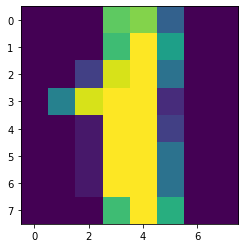

In [3]:
###DIGITS###

from sklearn.datasets import load_digits
digits = load_digits()
digit = 1

extracted = digits.data[digits.target == digit]
plt.imshow(digits.images[digits.target == digit][0])
target_samples = torch.tensor(extracted).float()
target_samples = (target_samples)/16
print(target_samples)
p = target_samples.shape[1]
num_samples = target_samples.shape[0]

print("number of training samples "  +str(num_samples))

In [ ]:
K = 20
weight = SoftmaxWeight(K, p, [], mode = 'Constant')
dif = DIFDensityEstimator(target_samples, K, initial_w = weight)
loss_values = dif.train(10000, visual = True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.56it/s, loss = -144.60853576660156]


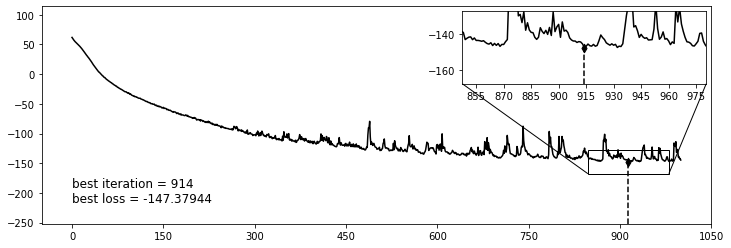

In [6]:
K = 20
weight = SoftmaxWeightOver(K, p, [], mode = 'Linear')
dif = DIFDensityEstimator(target_samples, K, initial_w = weight)
loss_values = dif.train(1000,50, visual = True)

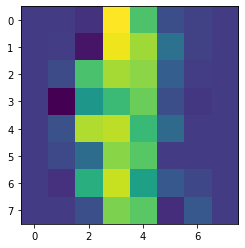

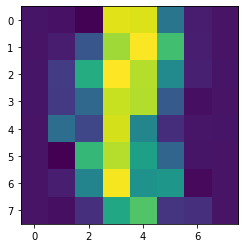

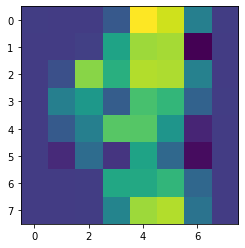

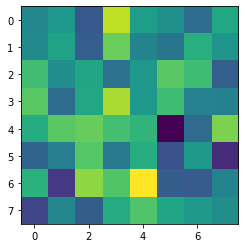

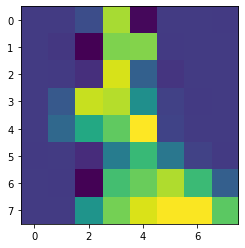

In [7]:
for _ in range(5):
    plt.figure()
    plt.imshow(dif.sample_model(1).cpu().detach().reshape(8,8))

In [ ]:
###MNIST###

import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
images = mnist_trainset.data.flatten(start_dim=1)
targets = mnist_trainset.targets

digit = 2
digit = 'all'
if digit != 'all':
    extracted = images[targets == digit].float()
else: 
    extracted = images.float()
target_samples = extracted

num_samples  = target_samples.shape[0]
print('number of samples = ' + str(num_samples))
p = target_samples.shape[-1]
plt.imshow(target_samples[torch.randint(low = 0, high = num_samples, size = [1])].reshape(28,28))

train_set, test_set = target_samples[:4000], target_samples[4000:]

In [ ]:
K = 20
dif = DIFDensityEstimator(target_samples, K)
dif.train(200,3000)
dif.model_visual()

In [ ]:
num_samples = target_samples.shape[0]
epochs =1000
batch_size = int(num_samples/50)
initial_w = SoftmaxWeight(200, p,[5,5,5], 'Constant')
DIF = DIFDensityEstimator(target_samples, 200, initial_w = initial_w)
DIF.train(epochs, batch_size, visual = True)
DIF.model_visual(num_samples=int(num_samples/5))

In [ ]:
for _ in range(5):
    plt.figure()
    plt.imshow(DIF.sample_model(1).cpu().detach().reshape(28,28))